## Let's fit data using y=a+bx+cx^2

In [1]:
import numpy as np
import sklearn

In [2]:
np.random.seed(42)

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

## Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.
### class sklearn.preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [25]:
poly_features

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

In [26]:
X.shape

(100, 1)

In [27]:
X[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

# 產生  x^1, x^2

In [32]:
X_poly = poly_features.fit_transform(X)

In [33]:
X_poly.shape

(100, 2)

In [34]:
(-0.75275929)*(-0.75275929)

0.566646548681304

In [35]:
X_poly[:5]

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281],
       [ 0.59195091,  0.35040587],
       [-2.06388816,  4.25963433]])

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [39]:
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

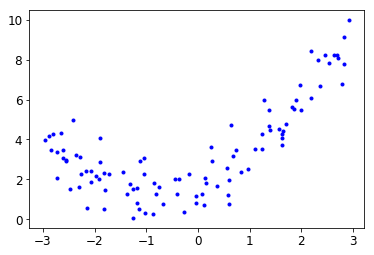

In [40]:
plt.plot(X, y, "b.")

In [56]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)

In [57]:
X_new.shape

(100, 1)

In [58]:
X_new_poly.shape

(100, 2)

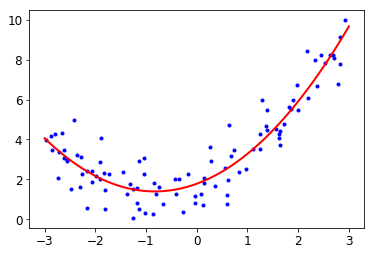

In [60]:
plt.plot(X, y, "b.")
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

In [46]:
X_new_1=np.array([[0],
                [2]])

In [47]:
X_new_1

array([[0],
       [2]])

In [49]:
X_new_2_poly = poly_features.transform(X_new_1)

In [50]:
X_new_2_poly 

array([[0., 0.],
       [2., 4.]])

In [51]:
y_new_2 = lin_reg.predict(X_new_2_poly)

In [52]:
y_new_2

array([[1.78134581],
       [5.90693421]])

In [53]:
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [54]:
1.78134581+0.93366893*0+0.56456263*0

1.78134581

In [55]:
1.78134581+0.93366893*2+0.56456263*4

5.906934189999999